In [1]:
import time     
from pathlib import Path
from tempfile import TemporaryDirectory
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as manim
import numpy as np

from SVGFuncAnimation import SVGFuncAnimation

plt.rcParams['animation.html'] = 'jshtml'
plt.rcParams['animation.embed_limit'] = 2 ** 128
plt.rcParams['animation.frame_format'] = 'svg'

def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        return result, te-ts
    return timed


def get_animation(constructor, size=100):
    np.random.seed(0)
    
    def update_line(num, data, line):
        line.set_data(data[..., :num])
        return line,
    
    fig = plt.figure()
    data = np.random.rand(2, size)
    l, = plt.plot([], [], 'r-')
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    anim = constructor(fig, update_line, range(size), fargs=(data, l), interval=50)
    plt.close()
    
    return anim


@timeit
def get_anim_size(constructor, size):
    anim = get_animation(constructor, size)
    return len(anim.to_jshtml())

In [2]:
x = list(range(110, 5100, 100))
svgs =  [get_anim_size(SVGFuncAnimation, i) for i in tqdm(x)]
func =  [get_anim_size(manim.FuncAnimation, i) for i in tqdm(x)]

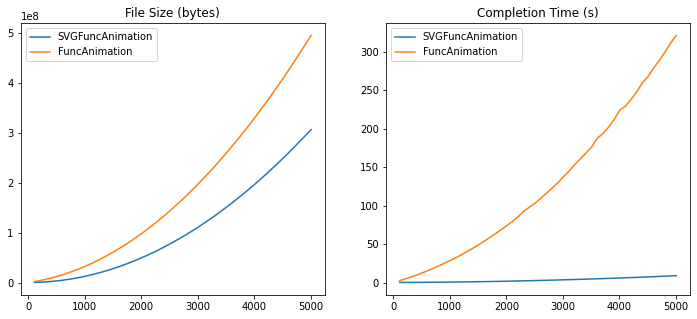

In [3]:
svgs_len, svgs_t = list(zip(*svgs))
func_len, func_t = list(zip(*func))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, svgs_len, label='SVGFuncAnimation')
plt.plot(x, func_len, label='FuncAnimation')
plt.title('File Size (bytes)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, svgs_t, label='SVGFuncAnimation')
plt.plot(x, func_t, label='FuncAnimation')
plt.title('Completion Time (s)')
plt.legend()